In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import os
import scienceplots

plt.style.use(['science'])

## remove minor ticks
plt.rcParams["xtick.top"] = False 
plt.rcParams["xtick.minor.visible"] = False 
plt.rcParams["ytick.minor.visible"] = False 
plt.rcParams["ytick.right"] = False 

df = pd.read_csv("plots/all_model_predictions_500labeledposts.csv")
df.columns

Index(['l8b_1', 'l8b_2', 'gi', 'l31_8b', 'qwen', 'ensemble', 'y_true'], dtype='object')

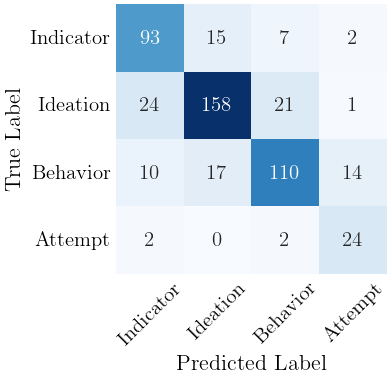

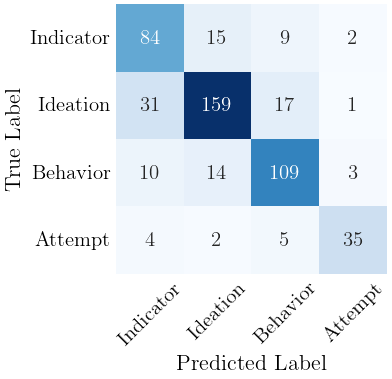

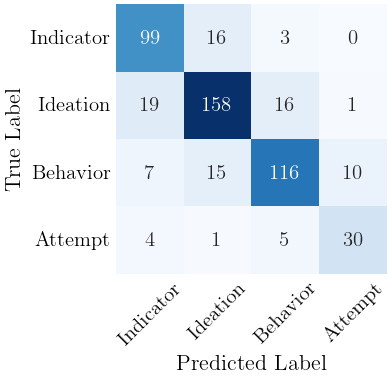

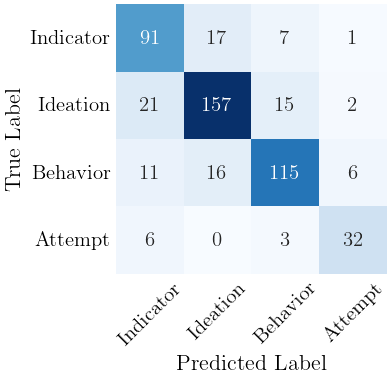

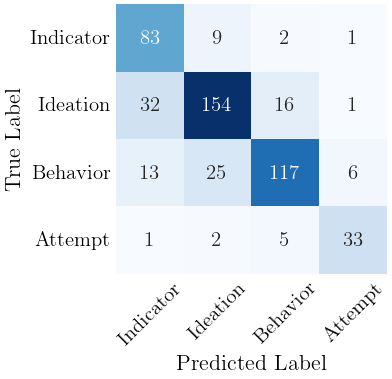

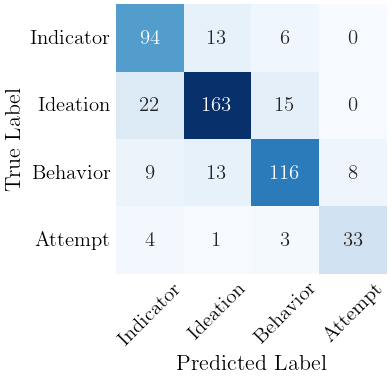

In [2]:
# List of columns to plot confusion matrices for
cols = ['l8b_1', 'l8b_2', 'gi', 'l31_8b', 'qwen', 'ensemble']

for col in cols:
    cm = confusion_matrix(df[col], df["y_true"])

    plt.figure(figsize=(3.5, 3.5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                annot_kws={"size": 15})  # Adjust font size with annot_kws

    # Define class labels
    classes = ["Indicator", "Ideation", "Behavior", "Attempt"]

    # Bold x and y axis labels
    plt.xlabel('Predicted Label', fontsize=16, fontweight='bold')
    plt.ylabel('True Label', fontsize=16, fontweight='bold')

    # Add xticks and yticks with class names
    plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=classes, fontsize=15, rotation=45)
    plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=classes, fontsize=15, rotation=0)

    # Remove tick marks
    plt.tick_params(left=False, bottom=False)

    # Make directory for plots
    os.makedirs("plots", exist_ok=True)

    # Save each confusion matrix as a PDF
    plt.savefig(f'plots/confusion_matrix_500_{col}.pdf', bbox_inches='tight')

    plt.show()


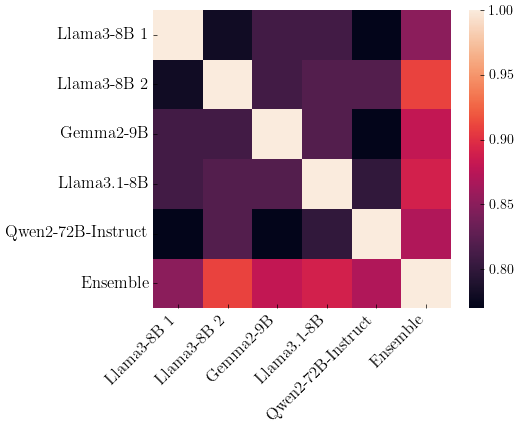

In [6]:


df_no_ytrue = df.drop(columns=["y_true"])
cm = np.round(df_no_ytrue[df_no_ytrue.columns ].corr(),2)

models = ['Llama3-8B 1', 'Llama3-8B 2', 'Gemma2-9B', 'Llama3.1-8B', 'Qwen2-72B-Instruct', "Ensemble"]


plt.figure(figsize=(5.5, 4.5))
plt.rcParams["xtick.top"] = False 
plt.rcParams["xtick.minor.visible"] = False 
plt.rcParams["ytick.minor.visible"] = False 
plt.rcParams["ytick.right"] = False 
sns.heatmap(cm, annot=False, cmap='rocket', cbar=True, xticklabels=models, yticklabels=models)


# Set x-ticks and y-ticks with proper labels
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)  # No rotation for y-axis labels

plt.tight_layout()  # Adjust layout to fit labels properly
plt.savefig('plots/model_heatmap_500.pdf')


plt.show()